# Demo example

Date: 27-09-2024

Author: Martin Proks

In [1]:
!export CUDA_VISIBLE_DEVICES=1

In [2]:
from scvi.hub import HubModel
from numba.core.errors import NumbaDeprecationWarning

import warnings
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)

In [3]:
from scanvi_explainer import SCANVIDeep, SCANVIBoostrapper
from scanvi_explainer.plots import feature_plot

In [4]:
hmo = HubModel.pull_from_huggingface_hub(
    repo_name="brickmanlab/mouse-scanvi",
    cache_dir="/tmp/mouse_scanvi",
    revision="v1.0",
)

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
lvae = hmo.model
lvae

INFO     Loading model...                                                                                          


Trainer will use only 1 of 4 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=4)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.


INFO     File                                                                                                      
         /tmp/mouse_scanvi/models--brickmanlab--mouse-scanvi/snapshots/122feddff5447c62e8a0b320650dbb6c7a1d764a/mod
         el.pt already downloaded                                                                                  


/home/fdb589/Brickman/github/scanvi-explainer/.venv/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/fdb589/Brickman/github/scanvi-explainer/.venv/ ...
/home/fdb589/Brickman/github/scanvi-explainer/.venv/lib/python3.10/site-packages/scvi/model/base/_utils.py:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects wil

ScanVI Model with the following params: 
unlabeled_category: Unknown, n_hidden: 128, n_latent: 10, n_layers: 2, dropout_rate: 0.1, dispersion: gene, 
gene_likelihood: nb
Training status: Trained
Model's adata is minified?: False

In [6]:
e = SCANVIDeep(lvae, train_size=0.8, batch_size=128)
e

SCANVIDeep with the following parameters:
train_size=0.8, test_size=0.2, batch_size=128, labels_key=ct, layers_key=counts
training_on=cuda:0

In [7]:
shap_values = e.shap_values()

  0%|          | 0/15 [00:00<?, ?it/s]

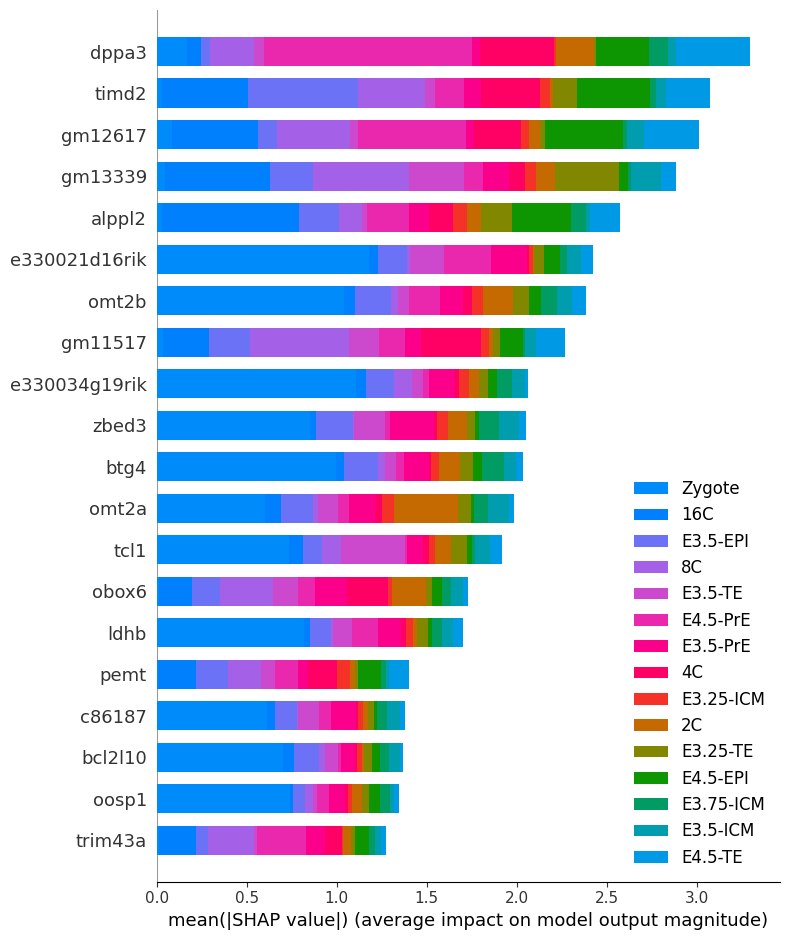

In [8]:
import shap


shap.summary_plot(
    shap_values,
    e.test['X'],
    feature_names=lvae.adata.var_names, 
    class_names=lvae.adata.obs.ct.cat.categories
)

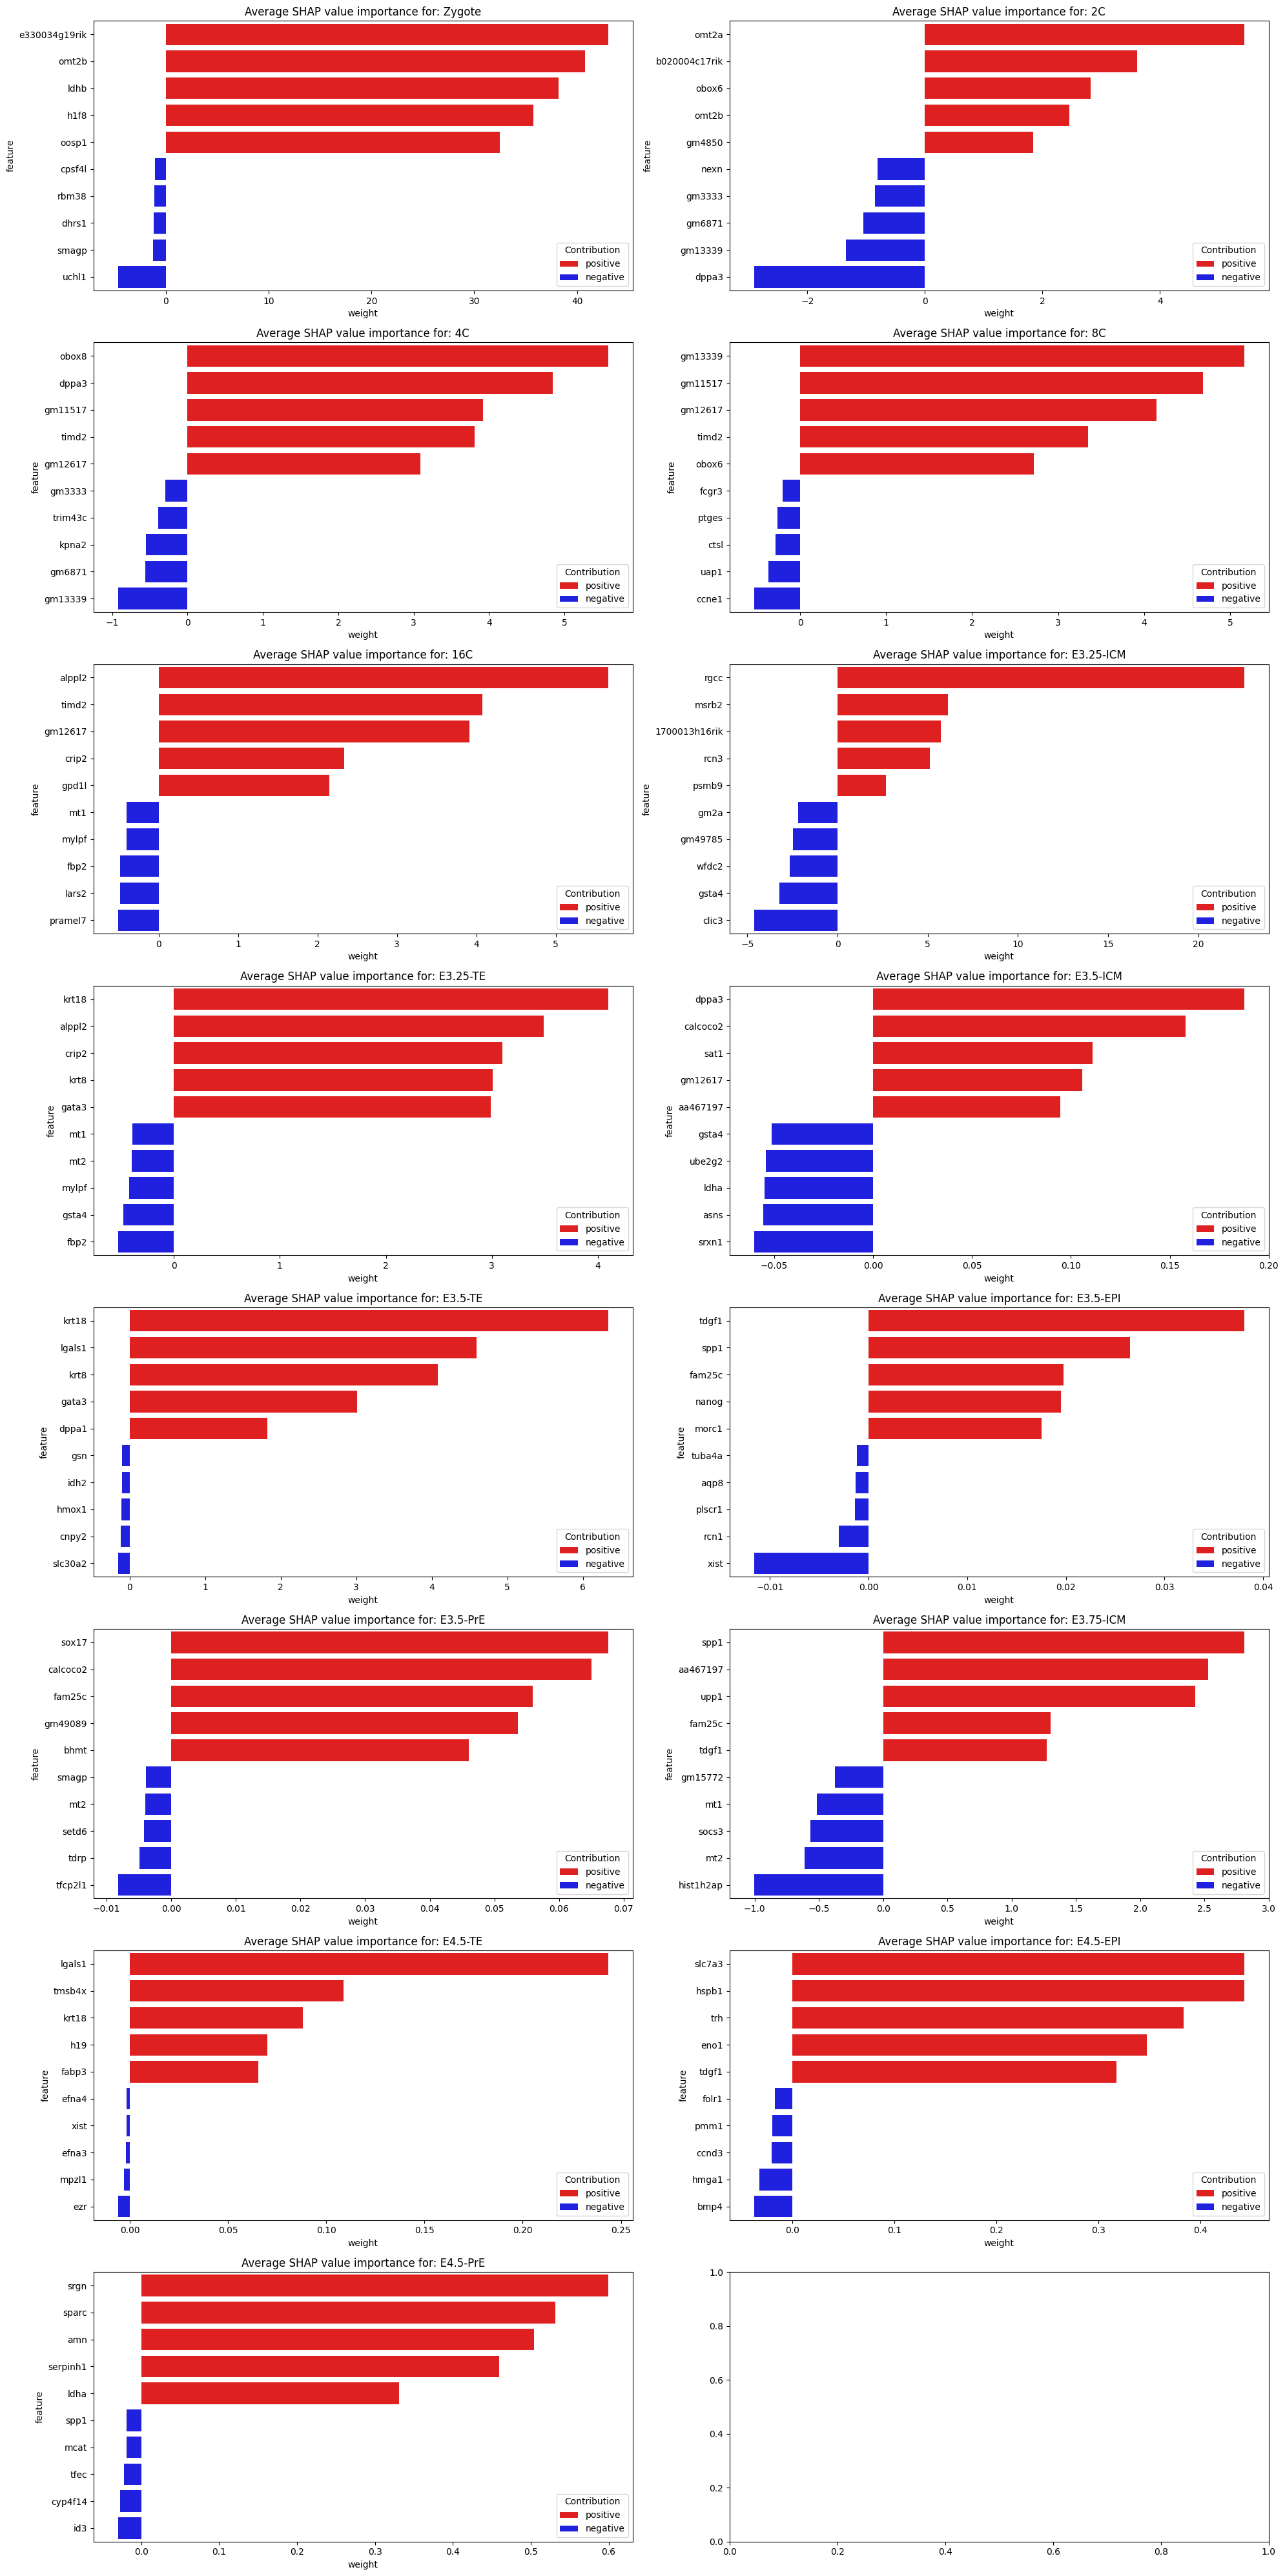

In [9]:
feature_plot(e, shap_values, subset=True, top_n=10)

## Bootstrapper

In order to strenghten the predicted features (genes), we have also implemented
bootstrapping approach. The plots below calculates $\mu$ value of each bootstrap.
To adjust parameters, please refer to the documentation.

In [10]:
bootstrapper = SCANVIBoostrapper(lvae, n_bootstraps=10)

In [11]:
shap_values = bootstrapper.run(train_size=0.8, batch_size=64)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

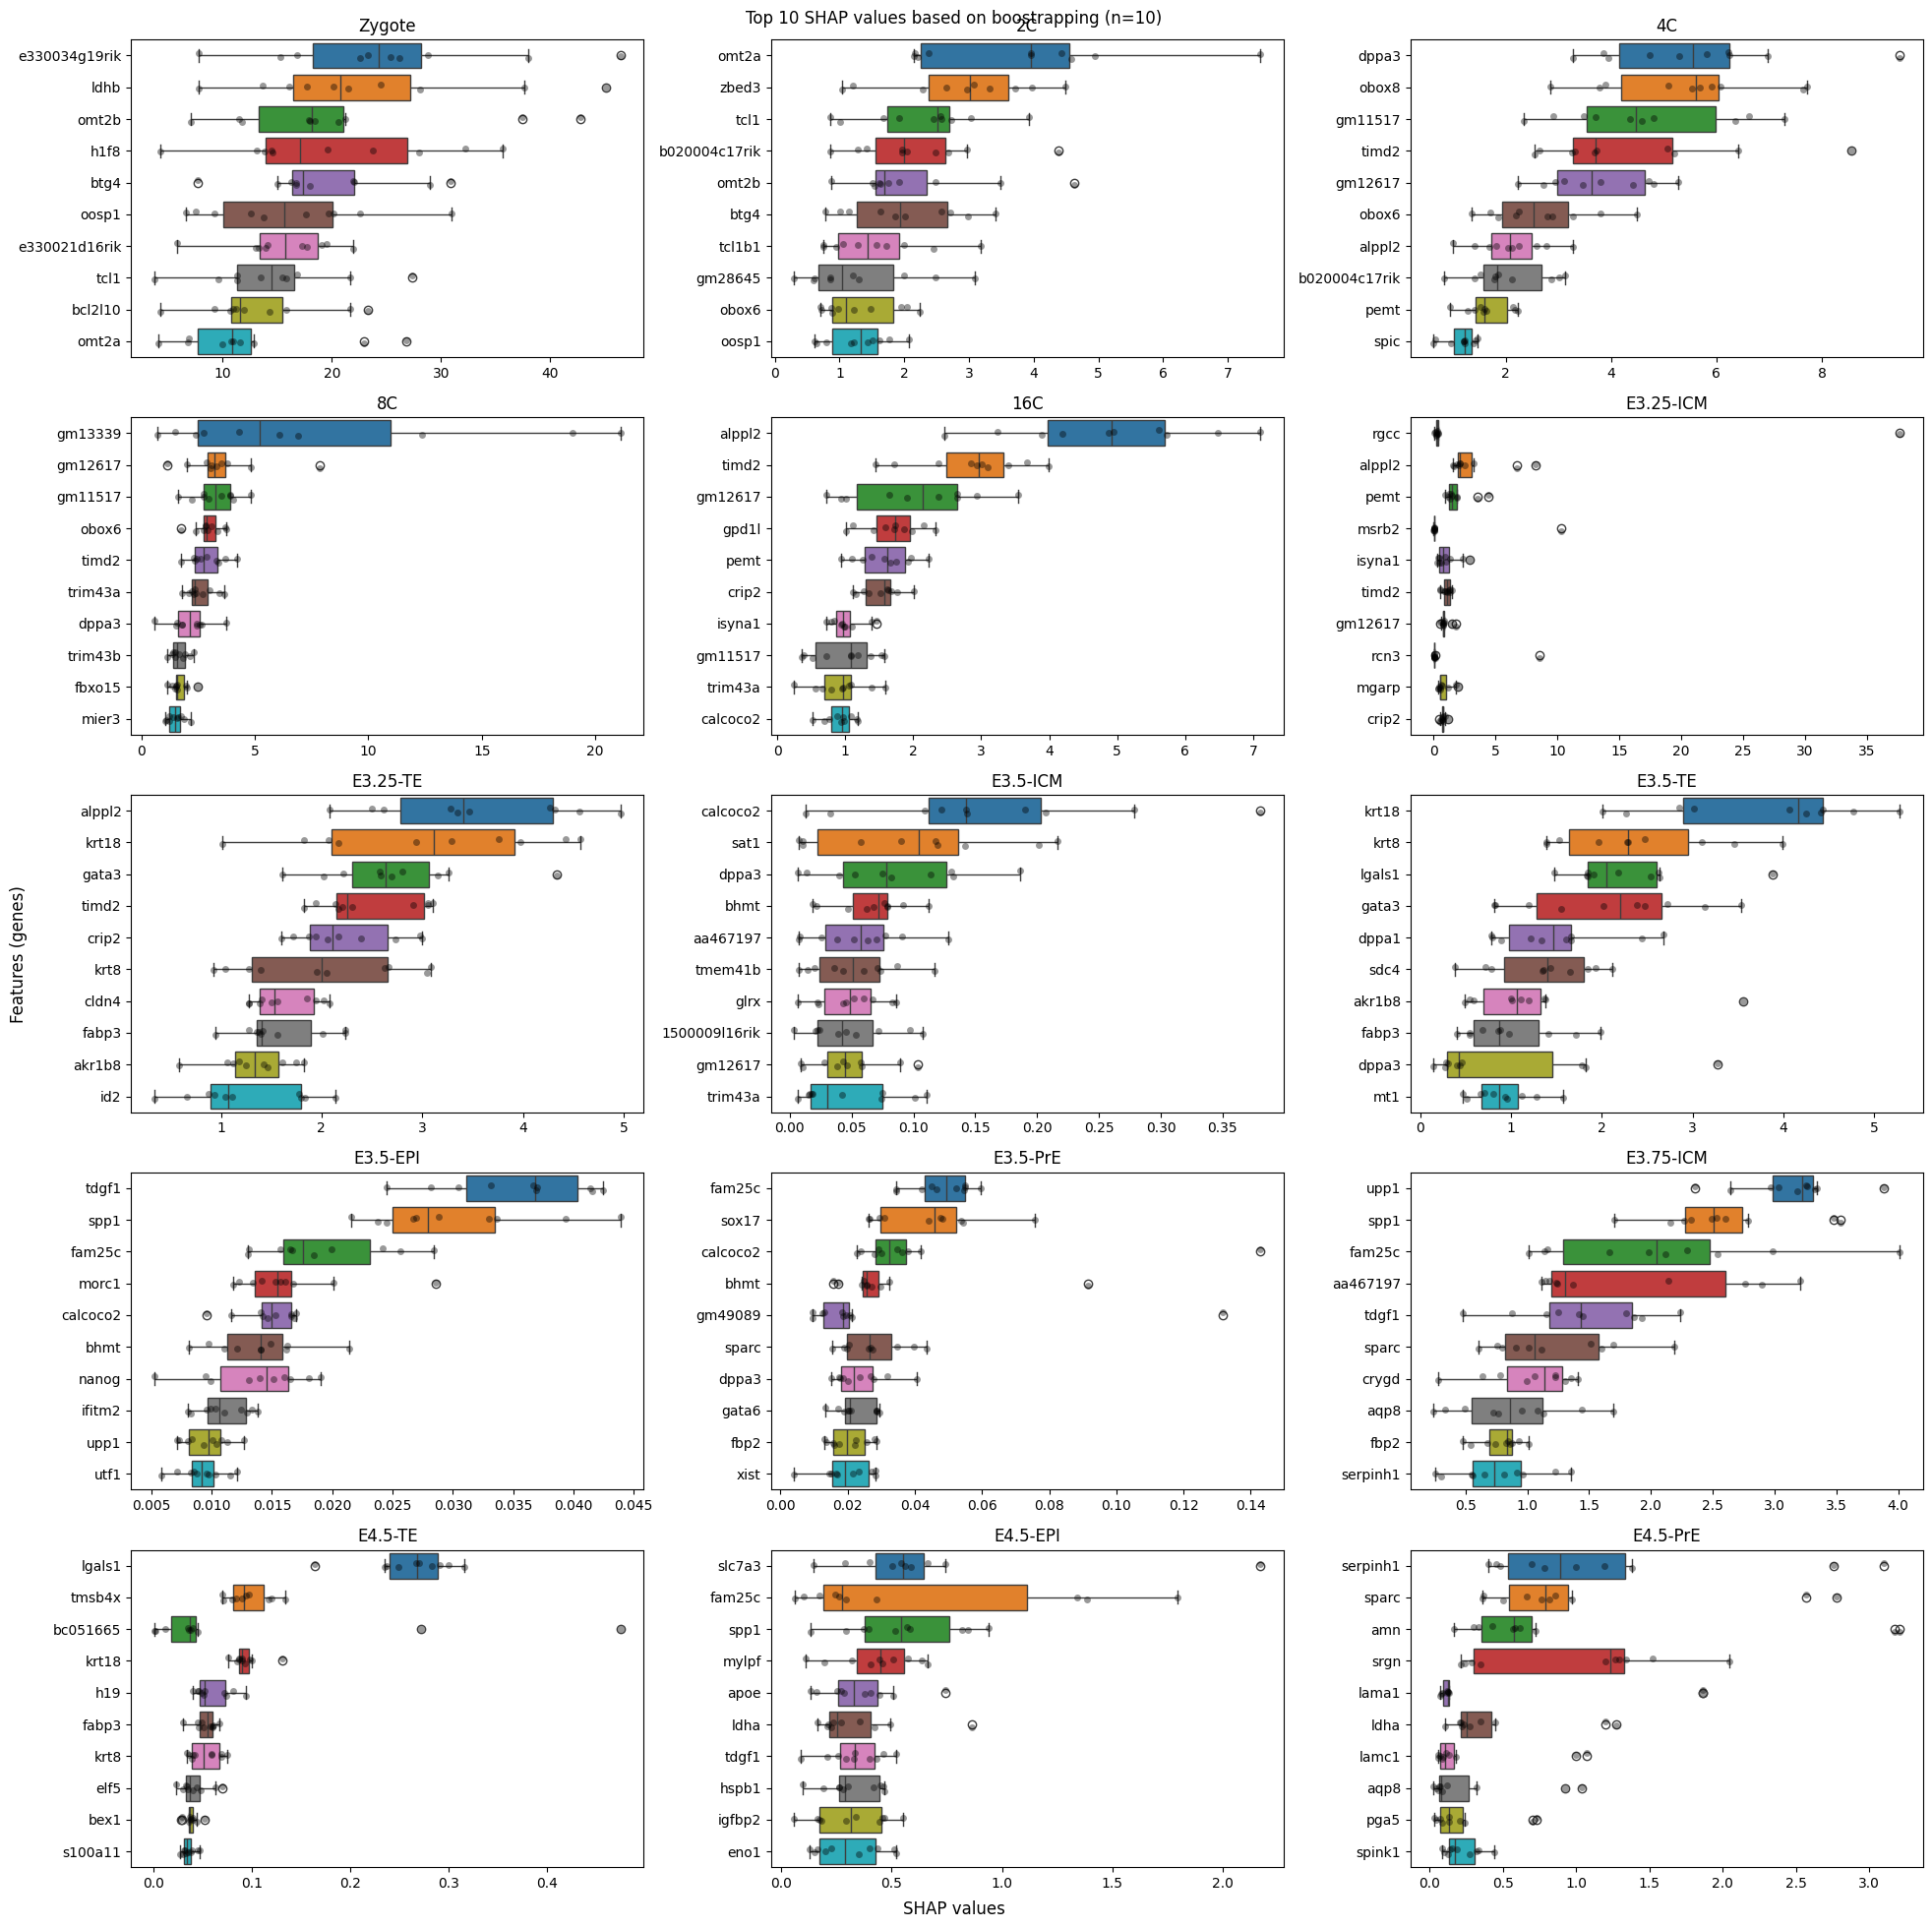

In [12]:
bootstrapper.feature_plot(shap_values)

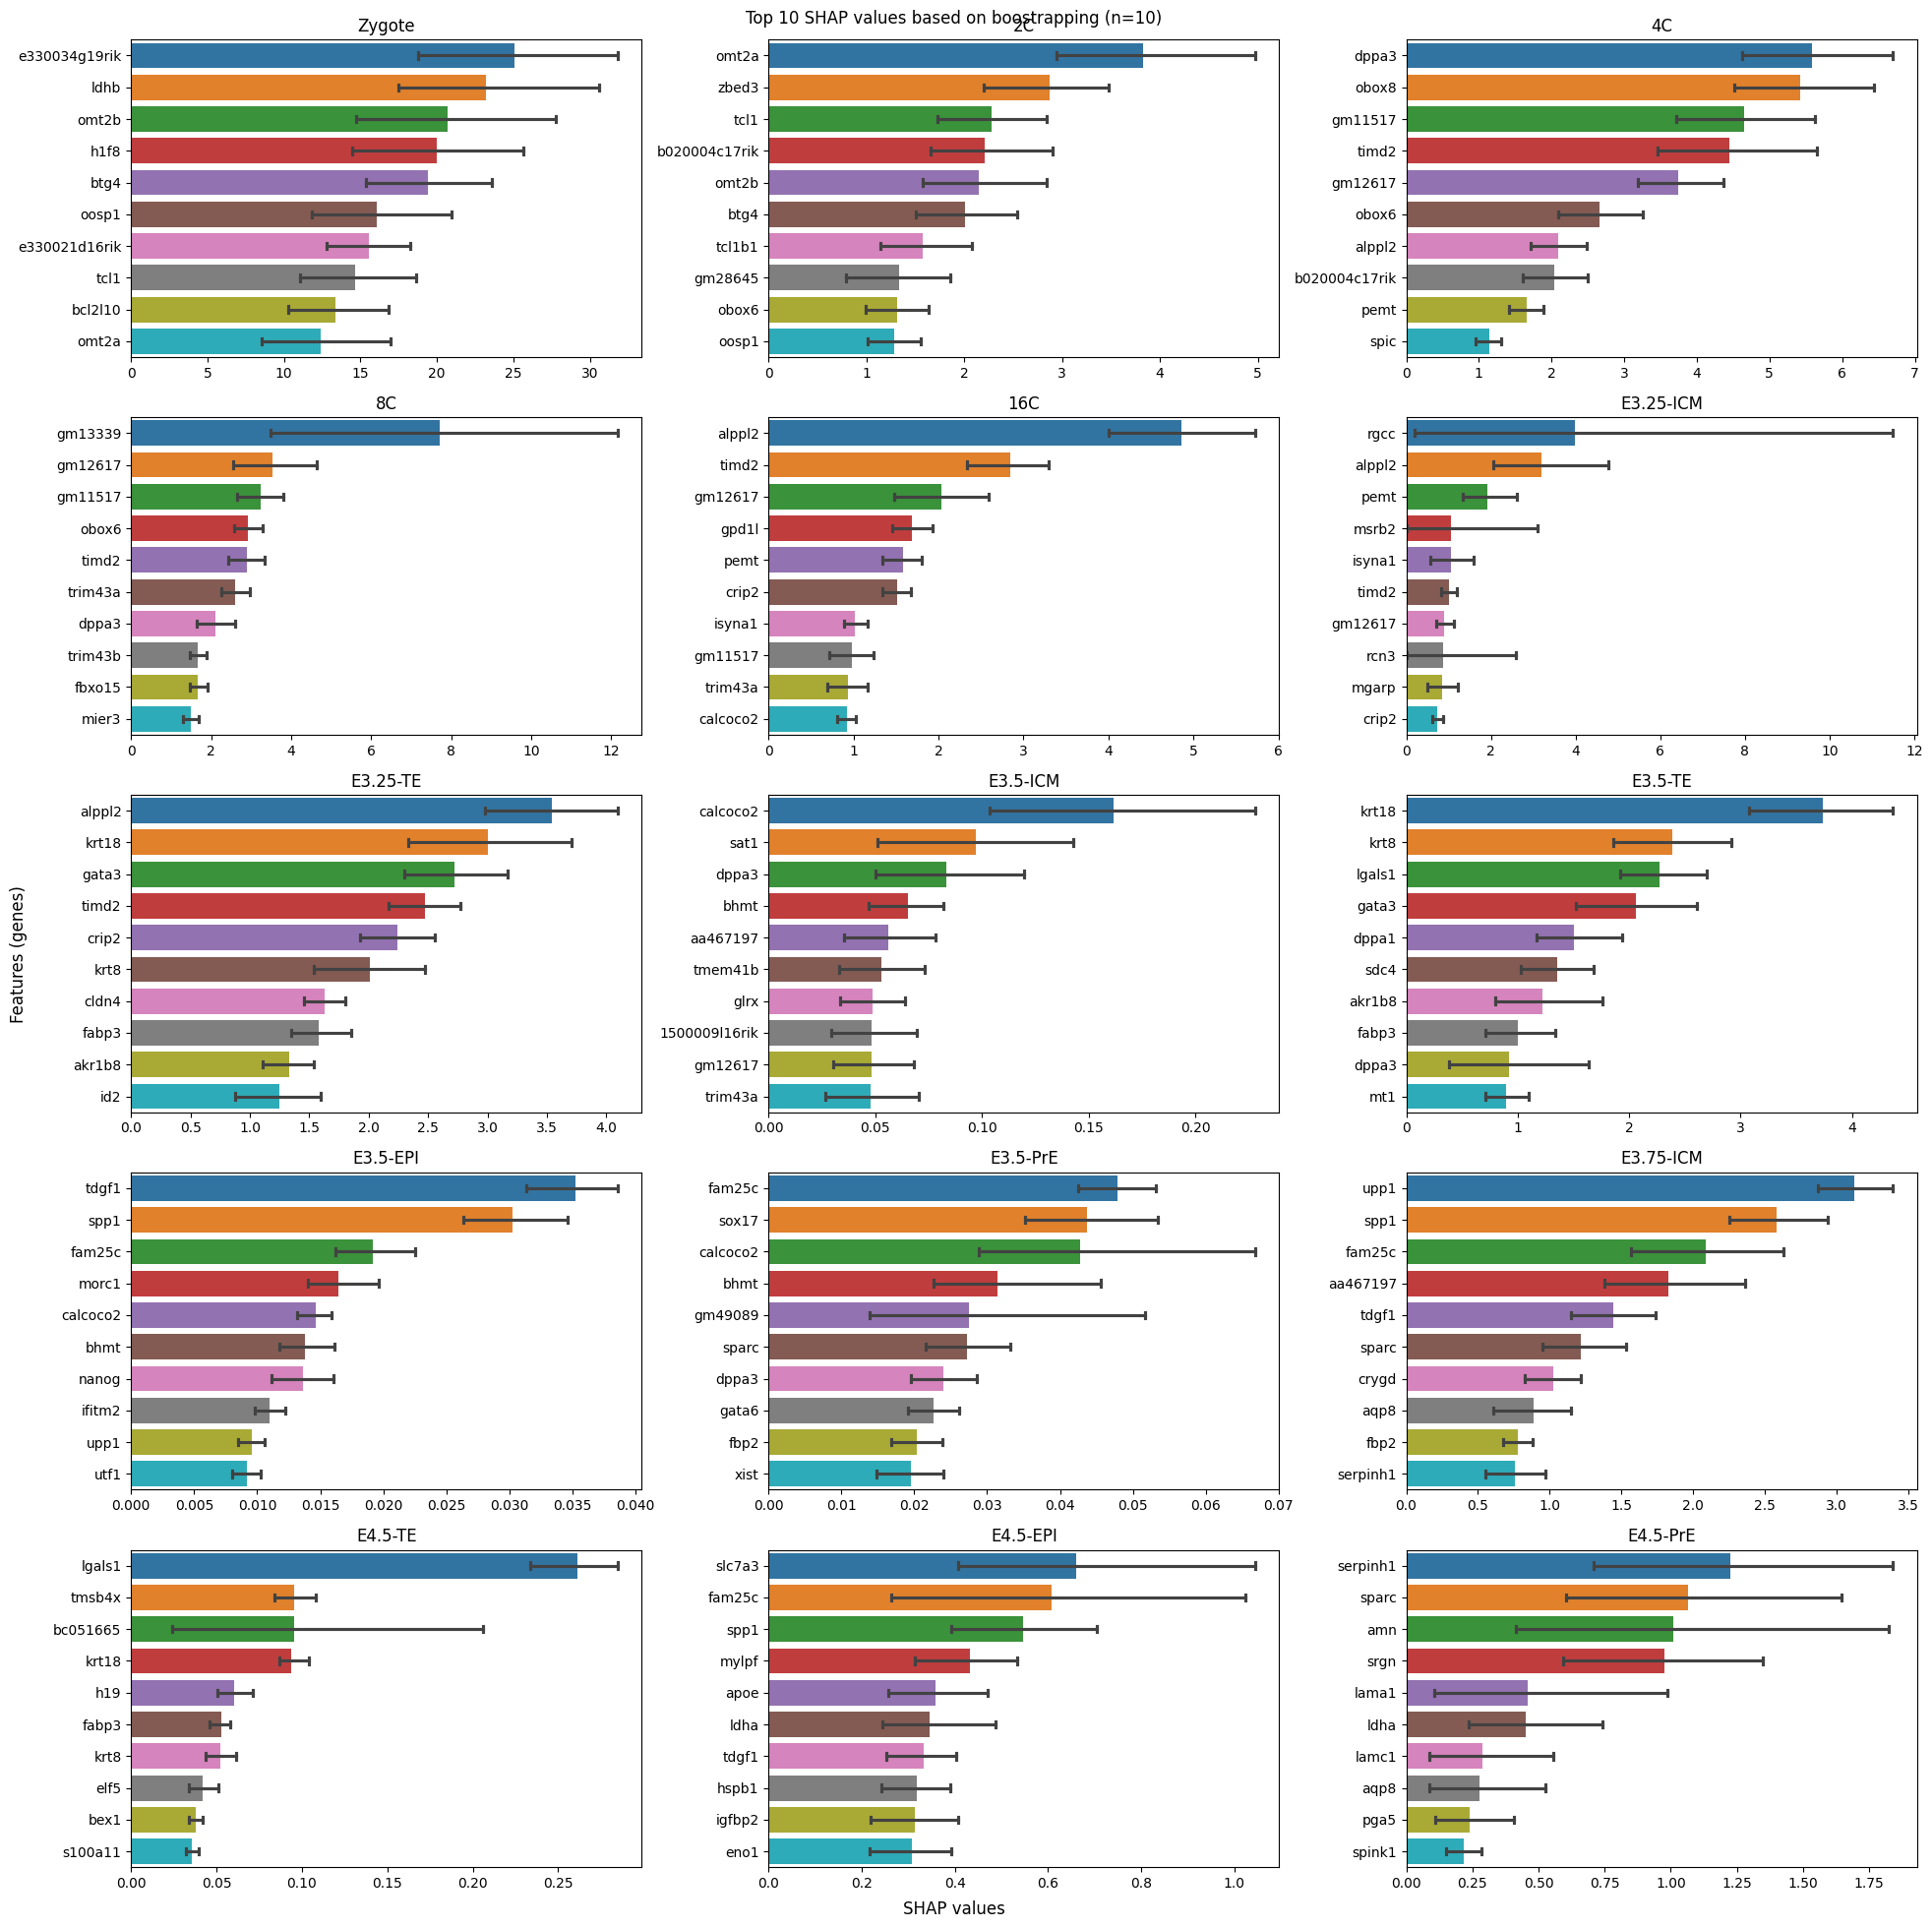

In [13]:
bootstrapper.feature_plot(shap_values, kind="barplot")